### Data Collection and Preparation

For this task we will be using the following libraries:
- `Pandas` for managing the data
- ``NumPy`` for math operations
- ``Sklearn`` for ML
- ``Seaborn`` for visialization
- `Matplotlib` for additional plotting


Data Collection and Preparation
For this task we will be using the following libraries:

Pandas for managing the data
NumPy for math operations
Sklearn for ML
Seaborn for visialization
Matplotlib for additional plotting

In [26]:
#install specific version of libraries used in lab

In [43]:
#import pandas & numpy library

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline



#read data file

data = 'charging_sessions.csv'

df = pd.read_csv("charging_sessions.csv")


In [28]:
#print the first 5 rows of the datafile

df.head(5)

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Burbank,2018-01-01 08:53:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0
1,Burbank,2018-01-01 09:53:00,9.0,33.0,Fair,992.08,0.0,0.0,9.0
2,Burbank,2018-01-01 10:53:00,9.0,21.0,Haze,992.08,0.0,0.0,9.0
3,Burbank,2018-01-01 11:53:00,9.0,29.0,Partly Cloudy,992.08,0.0,0.0,9.0
4,Burbank,2018-01-01 12:53:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0


In [29]:
#print the last 5 rows of the datafile

df.tail(5)

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
29239,Burbank,2021-01-01 03:53:00,13.0,33.0,Fair,986.81,0.0,0.0,13.0
29240,Burbank,2021-01-01 04:53:00,12.0,33.0,Fair,986.81,11.0,0.0,12.0
29241,Burbank,2021-01-01 05:53:00,12.0,33.0,Fair,987.47,9.0,0.0,12.0
29242,Burbank,2021-01-01 06:53:00,11.0,33.0,Fair,987.14,13.0,0.0,11.0
29243,Burbank,2021-01-01 07:53:00,10.0,33.0,Fair,987.80,6.0,0.0,10.0


In [44]:
# df.columns

df.dtypes

Unnamed: 0            int64
id                   object
connectionTime       object
disconnectTime       object
doneChargingTime     object
kWhDelivered        float64
sessionID            object
siteID                int64
spaceID              object
stationID            object
timezone             object
userID              float64
userInputs           object
dtype: object

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29244 entries, 0 to 29243
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     29244 non-null  object 
 1   timestamp                29244 non-null  object 
 2   temperature              29219 non-null  float64
 3   cloud_cover              29224 non-null  float64
 4   cloud_cover_description  29224 non-null  object 
 5   pressure                 29236 non-null  float64
 6   windspeed                29158 non-null  float64
 7   precipitation            29244 non-null  float64
 8   felt_temperature         29218 non-null  float64
dtypes: float64(6), object(3)
memory usage: 2.0+ MB


In [32]:
df.describe()

,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature
count,29219.000000,29224.000000,29236.000000,29158.000000,29244.000000,29218.000000
mean,17.885622,30.107993,986.879400,8.566568,0.059360,17.731433
std,6.454604,5.400388,3.607065,6.699889,0.471682,6.321100
min,2.000000,4.000000,971.000000,0.000000,0.000000,0.000000
25%,13.000000,26.000000,984.500000,6.000000,0.000000,13.000000
50%,17.000000,33.000000,986.480000,7.000000,0.000000,17.000000
75%,22.000000,34.000000,989.110000,13.000000,0.000000,22.000000
max,46.000000,47.000000,999.650000,57.000000,18.540000,42.000000


In [33]:
#Here we can see the lenght of the dataset

len(df)

29244

In [34]:
df.describe(include = "all")

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
count,29244,29244,29219.000000,29224.000000,29224,29236.000000,29158.000000,29244.000000,29218.000000
unique,1,29244,NaN,NaN,23,NaN,NaN,NaN,NaN
top,Burbank,2018-01-01 08:53:00,NaN,NaN,Fair,NaN,NaN,NaN,NaN
freq,29244,1,NaN,NaN,17122,NaN,NaN,NaN,NaN
mean,NaN,NaN,17.885622,30.107993,NaN,986.879400,8.566568,0.059360,17.731433
std,NaN,NaN,6.454604,5.400388,NaN,3.607065,6.699889,0.471682,6.321100
min,NaN,NaN,2.000000,4.000000,NaN,971.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,13.000000,26.000000,NaN,984.500000,6.000000,0.000000,13.000000
50%,NaN,NaN,17.000000,33.000000,NaN,986.480000,7.000000,0.000000,17.000000
75%,NaN,NaN,22.000000,34.000000,NaN,989.110000,13.000000,0.000000,22.000000


In [35]:
df.isnull()

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
29239,False,False,False,False,False,False,False,False,False
29240,False,False,False,False,False,False,False,False,False
29241,False,False,False,False,False,False,False,False,False
29242,False,False,False,False,False,False,False,False,False


In [36]:
df.dropna(axis=0,inplace=False)

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Burbank,2018-01-01 08:53:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0
1,Burbank,2018-01-01 09:53:00,9.0,33.0,Fair,992.08,0.0,0.0,9.0
2,Burbank,2018-01-01 10:53:00,9.0,21.0,Haze,992.08,0.0,0.0,9.0
3,Burbank,2018-01-01 11:53:00,9.0,29.0,Partly Cloudy,992.08,0.0,0.0,9.0
4,Burbank,2018-01-01 12:53:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...
29239,Burbank,2021-01-01 03:53:00,13.0,33.0,Fair,986.81,0.0,0.0,13.0
29240,Burbank,2021-01-01 04:53:00,12.0,33.0,Fair,986.81,11.0,0.0,12.0
29241,Burbank,2021-01-01 05:53:00,12.0,33.0,Fair,987.47,9.0,0.0,12.0
29242,Burbank,2021-01-01 06:53:00,11.0,33.0,Fair,987.14,13.0,0.0,11.0


In [37]:
df

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Burbank,2018-01-01 08:53:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0
1,Burbank,2018-01-01 09:53:00,9.0,33.0,Fair,992.08,0.0,0.0,9.0
2,Burbank,2018-01-01 10:53:00,9.0,21.0,Haze,992.08,0.0,0.0,9.0
3,Burbank,2018-01-01 11:53:00,9.0,29.0,Partly Cloudy,992.08,0.0,0.0,9.0
4,Burbank,2018-01-01 12:53:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...
29239,Burbank,2021-01-01 03:53:00,13.0,33.0,Fair,986.81,0.0,0.0,13.0
29240,Burbank,2021-01-01 04:53:00,12.0,33.0,Fair,986.81,11.0,0.0,12.0
29241,Burbank,2021-01-01 05:53:00,12.0,33.0,Fair,987.47,9.0,0.0,12.0
29242,Burbank,2021-01-01 06:53:00,11.0,33.0,Fair,987.14,13.0,0.0,11.0


In [38]:
df.dropna(axis=1)

,city,timestamp,precipitation
0,Burbank,2018-01-01 08:53:00,0.0
1,Burbank,2018-01-01 09:53:00,0.0
2,Burbank,2018-01-01 10:53:00,0.0
3,Burbank,2018-01-01 11:53:00,0.0
4,Burbank,2018-01-01 12:53:00,0.0
...,...,...,...
29239,Burbank,2021-01-01 03:53:00,0.0
29240,Burbank,2021-01-01 04:53:00,0.0
29241,Burbank,2021-01-01 05:53:00,0.0
29242,Burbank,2021-01-01 06:53:00,0.0


In [39]:
len(df)-len(df.dropna())

139

In [45]:
df[df['kWhDelivered'].isnull()]

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs


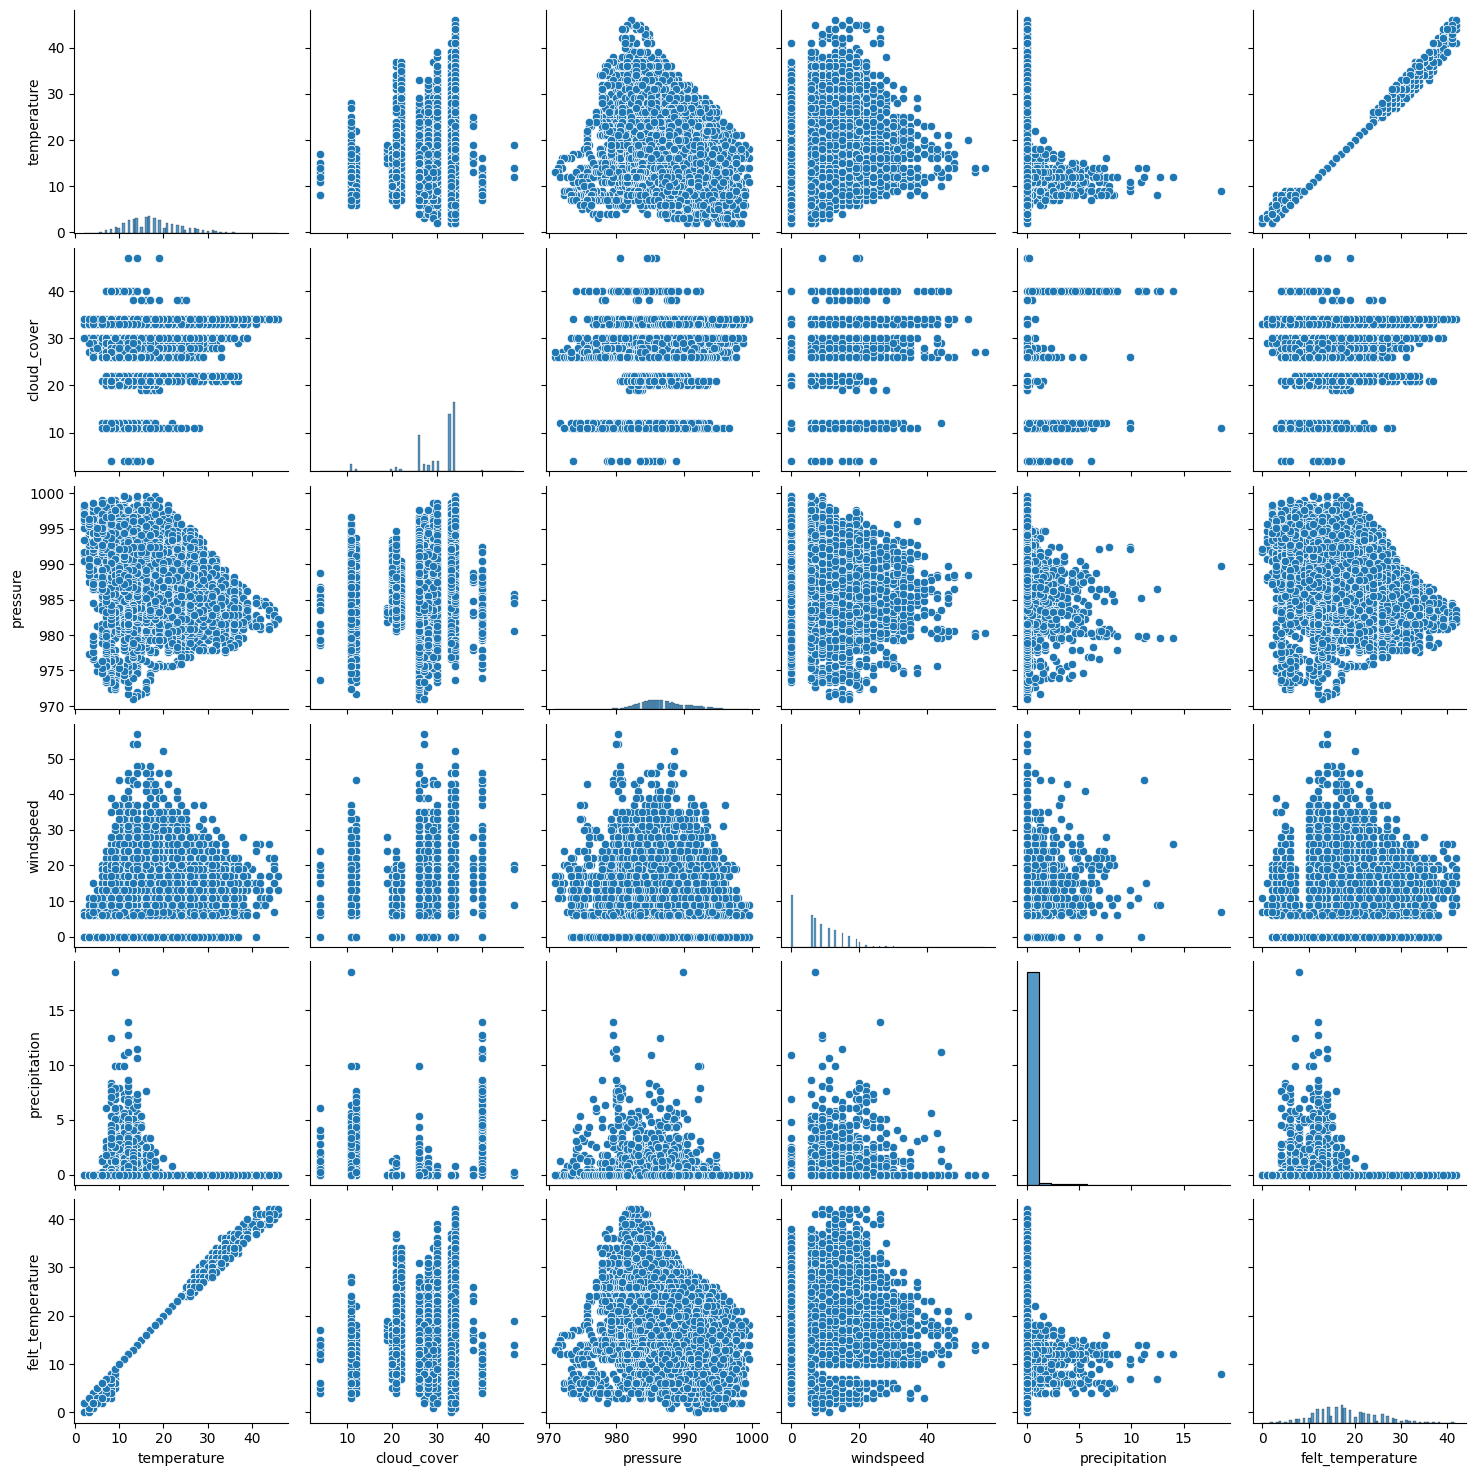

In [41]:
sns.pairplot(df)
plt.show()

In [53]:
df.describe()

,Unnamed: 0,kWhDelivered,siteID,userID
count,66450.000000,66450.000000,66450.000000,49187.000000
mean,4726.102062,11.787916,1.472656,1800.494582
std,3568.025394,10.314789,0.499256,2617.548614
min,0.000000,0.501000,1.000000,1.000000
25%,1845.000000,5.097000,1.000000,431.000000
50%,3960.000000,9.140000,1.000000,818.000000
75%,7027.000000,14.183000,2.000000,1805.000000
max,15291.000000,108.797242,2.000000,19923.000000


In [54]:
df.describe()["kWhDelivered"]

count    66450.000000
mean        11.787916
std         10.314789
min          0.501000
25%          5.097000
50%          9.140000
75%         14.183000
max        108.797242
Name: kWhDelivered, dtype: float64

In [56]:
sns.pairplot(df["kWhDelivered"])
plt.show()

TypeError: 'data' must be pandas DataFrame object, not: <class 'pandas.core.series.Series'>